# Titanic - Machine Learning from Disaster

- Experimental flow

1. Data exploration
2. Data preprocessing
3. Models developement
4. Training
5. Evaluation
6. Testing
7. Results
8. Discussion


### Upload data

In [283]:
import os

PATH = f"{root}/Titanic/data/"
training_file = "train.csv"
train_path = os.path.join(PATH,training_file)

test_file = "test.csv"
test_path = os.path.join(PATH, test_file)

In [284]:
import pandas as pd

train = pd.read_csv(train_path)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [285]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration

### General Exploration

In [97]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Note**: On a first instance it is visible that most females survived and most males didn't, therefore this will be a valuable feature. As for the data types, there are integers, strings (text), floats, integers + strings (Ticket), and in some classes there are **NaN** values.

Because of this, hot-encoding or label-encoding will be applied in categorical classes such as 'Sex' and 'Embarked' and text-preprocessing techniques (tokenization, stemming, lemmatizing, )will be applied to convert classes such as 'Name' into a format suitable for analysis.

Each columns' **Nan** values will be treated differently.

- After some research, binary classes should not be hot-encoded since it leads to redundancies and in some aspects, they are already in a hot-encoded form (If I give you [(0, ), (1, )], you can know the complementary column [( , 1), ( , 0)]). Therefore, only a conversion from *string* to *binary* will be applied on this class

In [98]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)

- Below it's observable that there are no missing values in the Sex class.

In [99]:
print(f'Number of rows: {len(train)}')

Number of rows: 891


In [100]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### Sex and Survival relationship exploration

In [101]:
count_men = 0
count_women = 0

count_men_alive = 0
count_women_alive = 0

count_men_death = 0
count_women_death = 0

count_survival = 0
count_death = 0

number_of_passangers = len(train['PassengerId'])

for i, survival in enumerate(train['Survived'], 0):

  if survival == 1:
    count_survival += 1
    if train['Sex'].iloc[i] == 0: # Is a man
      count_men_alive += 1
      count_men += 1
      
    elif train['Sex'].iloc[i] == 1: # Is a woman
      count_women += 1
      count_women_alive += 1
    
    else: 
      print(f"Wrong value: {train['Sex'].iloc[i]}")
  
  else:
    count_death += 1
    if train['Sex'].iloc[i] == 0: # Is a man
      count_men_death += 1
      count_men += 1
      
    elif train['Sex'].iloc[i] == 1: # Is a woman
      count_women += 1
      count_women_death += 1
    
    else: 
      print(f"Wrong value: {train['Sex'].iloc[i]}")

overall_survival_men = round((count_men_alive/number_of_passangers)*100,2)
overall_survival_women = round((count_women_alive/number_of_passangers)*100,2)

overall_death_men = round((count_men_death/number_of_passangers)*100,2)
overall_death_women = round((count_women_death/number_of_passangers)*100,2)

survival_among_men = round((count_men_alive/count_men)*100,2)
survival_among_women = round((count_women_alive/count_women)*100,2)

death_among_men = round((count_men_death/count_men)*100,2)
death_among_women = round((count_women_death/count_women)*100,2)

survival = round((count_survival/number_of_passangers)*100,2)

print(f"Number of passangers: {number_of_passangers}")
print(f"Number of men: {count_men}")
print(f"Number of women: {count_women}")
print(" ")
print(f"Deaths ALL: {count_death}")
print(f"Deaths MEN: {count_men_death}")
print(f"Deaths WOMAN: {count_women_death}")
print(" ")
print(f"Survived ALL: {count_survival}")
print(f"Survived MEN: {count_men_alive}")
print(f"Survived WOMAN: {count_women_alive}")
print(" ")
print(f"Survival: {survival} %")
print(" ")
print(f"Overall survival MEN: {overall_survival_men} %")
print(f"Overall survival WOMEN: {overall_survival_women} %")
print(" ")
print(f"Survival among MEN: {survival_among_men} %")
print(f"Survival among WOMEN: {survival_among_women} %")
print(" ")
print(f"Overall deaths MEN: {overall_death_men} %")
print(f"Overall deaths WOMEN: {overall_death_women} %")
print(" ")
print(f"Deaths among MEN: {death_among_men} %")
print(f"Deaths among WOMEN: {death_among_women} %")




Number of passangers: 891
Number of men: 577
Number of women: 314
 
Deaths ALL: 549
Deaths MEN: 468
Deaths WOMAN: 81
 
Survived ALL: 342
Survived MEN: 109
Survived WOMAN: 233
 
Survival: 38.38 %
 
Overall survival MEN: 12.23 %
Overall survival WOMEN: 26.15 %
 
Survival among MEN: 18.89 %
Survival among WOMEN: 74.2 %
 
Overall deaths MEN: 52.53 %
Overall deaths WOMEN: 9.09 %
 
Deaths among MEN: 81.11 %
Deaths among WOMEN: 25.8 %


#### Useful insights

From the analysis above the following points can be extracted (some of them are useful for feature engineering and some are just interesting and curious):

- More than half of the people died (~61%)
- Among the men, 81 % died, 468 out of 549. **(This can be useful so as if 'Sex' is a man, 'Survival' is probably 0)**
- Among women, 74 % survived, 233 out of 314 **(This can be useful so as if 'Sex' is a woman, 'Survival' is probably 1)**

Now it would be interesting to make the same analysis with the 'Age' cass and observe if young people survived more than older ones.

### Age and Survival relationship analysis

#### Missing Values

First of all let's analyse the basic informationof this feature:

Looking at the descriptive table below, many things can be already known with ease:

- Since count = 714 and the number of passangers is 891, there are 177 **missing values**.
- The mean age of the people is 29 (quite young).
- Most of the people is under 40.
- The older person is 80 yo.

In [102]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Recheck NaN values

- Comprehension lists

In [103]:
null_values = sum([1 for value in train['Age'].isnull() if value])
null_values

177

- Pandas

In [104]:
null_values = train['Age'].isnull().values.sum() #  Indicates whether there are any missing values (True) or not (False)
null_values

177

##### Dealing with Missing data in 'Age'

In [105]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

- Making sure there are no missing values anymore

In [106]:
train['Age'].isnull().values.any()

False

#### Analysing 'Age' by group of ages

Since Titanic sank in 1912, age ranges are designed according to the same period:

- Infant: [0, 2] years old
- Child: (2, 12] years old
- Adolescent: (12, 18] years old
- Young: (18, 25] years old
- Middle-aged: (25, 40] years old -> added because most of the people falls here
- Adult: (40, 60] years old 
- Elderly: (60+) years old



In [107]:
infant = []
child = []
adolescent = []
young = []
middle_aged_young = []
middle_aged_adult = []
adult = []
elder = []

for age in train['Age']:
  if age <= 2:
    infant.append(age)
  elif 2 < age <= 12:
    child.append(age)
  elif 12 < age <= 18:
    adolescent.append(age)
  elif 18 < age <= 25:
    young.append(age)
  elif 25 < age <= 35:
    middle_aged_young.append(age)
  elif 35 < age <= 45:
    middle_aged_adult.append(age)
  elif 45 < age <= 60:
    adult.append(age)
  else:
    elder.append(age)

In [108]:
print(f"Number of infants: {len(infant)}; Overall: {round((len(infant)/number_of_passangers)*100, 2)} %")
print(f"Number of child: {len(child)}; Overall: {round((len(child)/number_of_passangers)*100, 2)} %")
print(f"Number of adolescent: {len(adolescent)}; Overall: {round((len(adolescent)/number_of_passangers)*100, 2)} %")
print(f"Number of young: {len(young)}; Overall: {round((len(young)/number_of_passangers)*100, 2)} %")
print(f"Number of middle aged young: {len(middle_aged_young)}; Overall: {round((len(middle_aged_young)/number_of_passangers)*100, 2)} %")
print(f"Number of middle aged adult: {len(middle_aged_adult)}; Overall: {round((len(middle_aged_adult)/number_of_passangers)*100, 2)} %")
print(f"Number of adult: {len(adult)}; Overall: {round((len(adult)/number_of_passangers)*100, 2)} %")
print(f"Number of elder: {len(elder)}; Overall: {round((len(elder)/number_of_passangers)*100, 2)} %")

Number of infants: 24; Overall: 2.69 %
Number of child: 45; Overall: 5.05 %
Number of adolescent: 70; Overall: 7.86 %
Number of young: 162; Overall: 18.18 %
Number of middle aged young: 373; Overall: 41.86 %
Number of middle aged adult: 114; Overall: 12.79 %
Number of adult: 81; Overall: 9.09 %
Number of elder: 22; Overall: 2.47 %


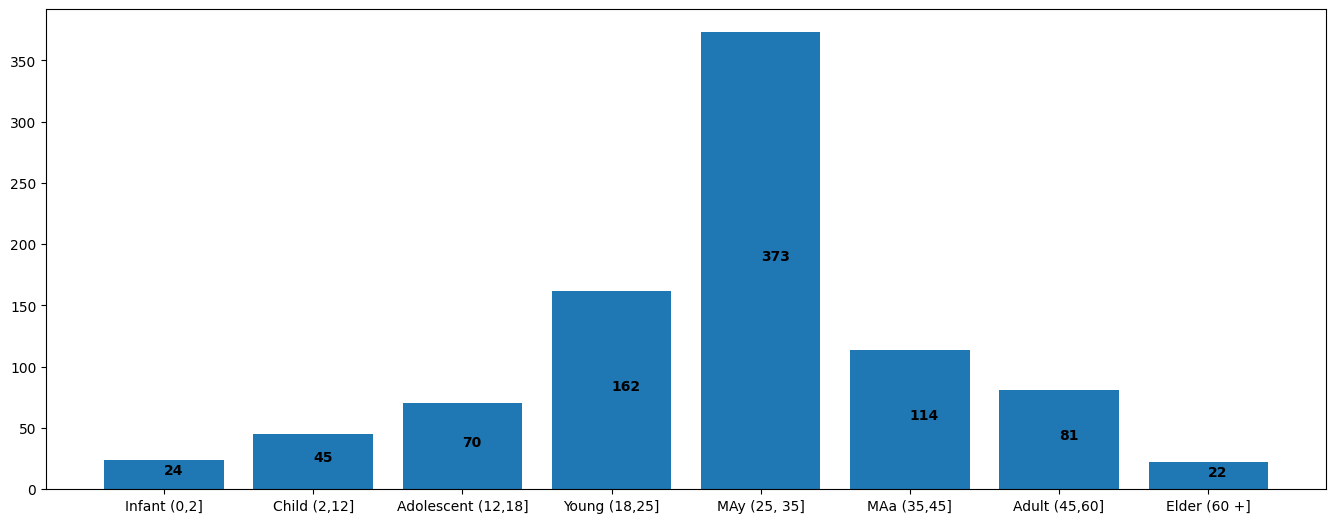

In [109]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ages = ['Infant (0,2]', 'Child (2,12]', 'Adolescent (12,18]', 'Young (18,25]', 'MAy (25, 35]', 'MAa (35,45]', 'Adult (45,60]', 'Elder (60 +]']
nages = [len(infant), len(child), len(adolescent), len(young), len(middle_aged_young), len(middle_aged_adult), len(adult), len(elder)]
ax.bar(ages, nages)

for idx, value in enumerate(nages):
  ax.text(idx, value/2, str(value), color = 'black', fontweight = 'bold')

plt.show()

Observing the bar plot above, it is clear that most of the peoples' age (41%) fell between 25 and 35 y.o. It would also be interesting to see how many females and males there are in each section. 

Meanwhile, the number of survivors for each cathegory will be analysed

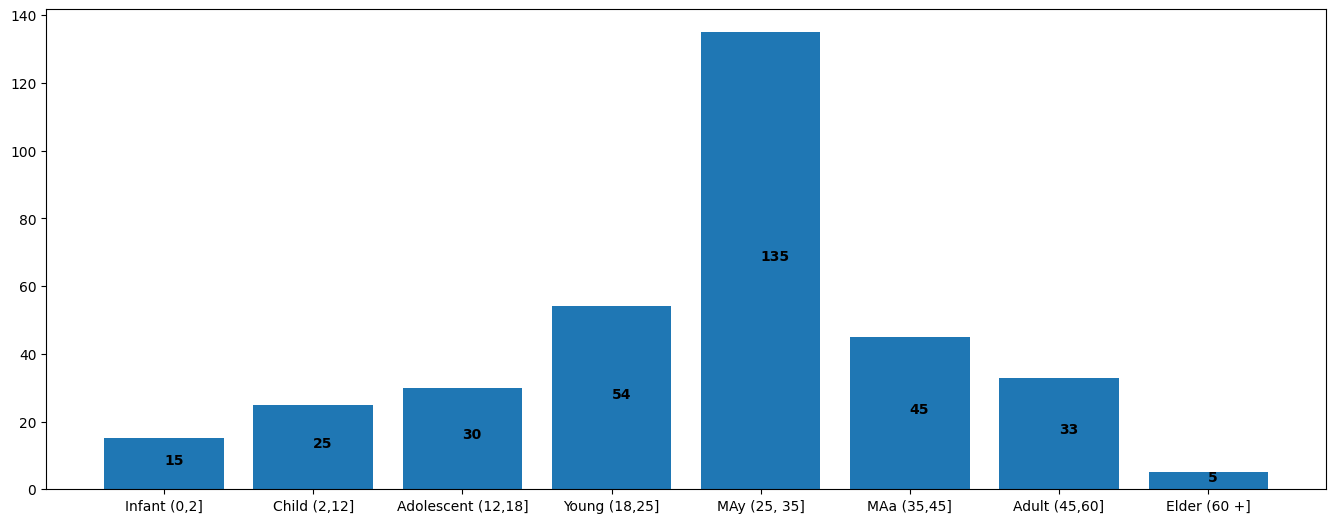

In [110]:
surv_infant = []
surv_child = []
surv_adolescent = []
surv_young = []
surv_middle_aged_young = []
surv_middle_aged_adult = []
surv_adult = []
surv_elder = []



for idx, age in enumerate(train["Age"]):
  if train["Survived"].iloc[idx] == 1:
      if age <= 2:
        surv_infant.append(age)
      elif 2 < age <= 12:
        surv_child.append(age)
      elif 12 < age <= 18:
        surv_adolescent.append(age)
      elif 18 < age <= 25:
        surv_young.append(age)
      elif 25 < age <= 35:
        surv_middle_aged_young.append(age)
      elif 35 < age <= 45:
        surv_middle_aged_adult.append(age)
      elif 45 < age <= 60:
        surv_adult.append(age)
      else:
        surv_elder.append(age)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
surv_nages = [len(surv_infant), len(surv_child), len(surv_adolescent), len(surv_young), len(surv_middle_aged_young), len(surv_middle_aged_adult), len(surv_adult), len(surv_elder)]
ax.bar(ages, surv_nages)

for idx, value in enumerate(surv_nages):
  ax.text(idx, value/2, str(value), color = 'black', fontweight = 'bold')
plt.show()

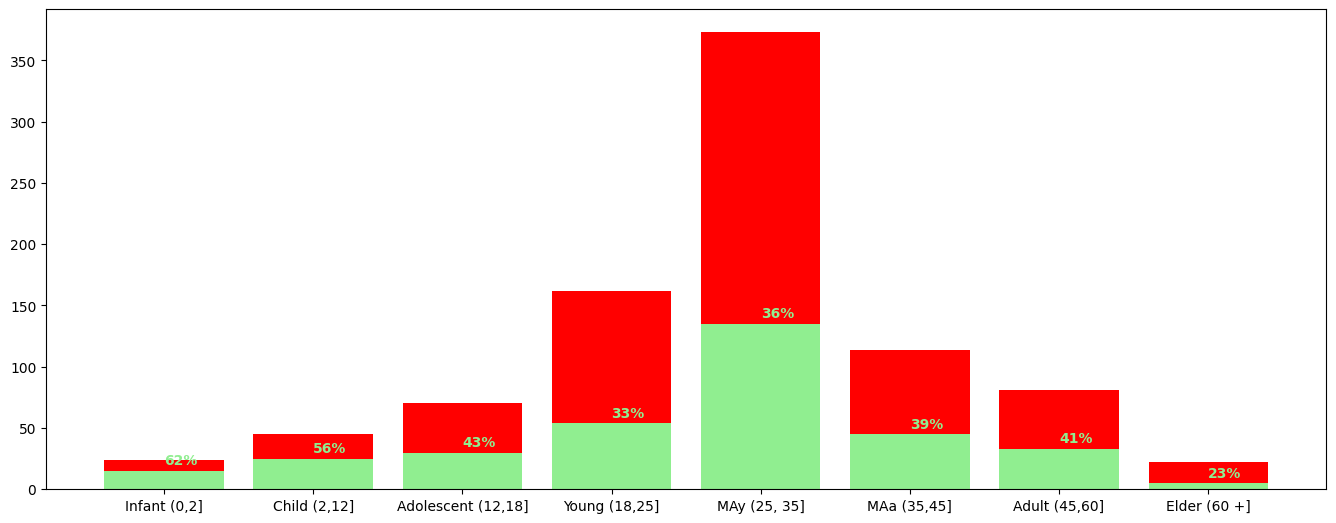

In [111]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

ax.bar(ages, nages, color='red')
ax.bar(ages, surv_nages, color='lightgreen')

for idx, value in enumerate(surv_nages):
  ax.text(idx, value+5, f'{str(round(value/nages[idx]*100))}%', color = 'lightgreen', fontweight = 'bold')

plt.show()

Insights from the 'Age' analysis:

- Most people is between 20 and 40 years old
- Elder people had less chance of survival while infants survived the most (in %, not number)
- Although in some cases it is possible to predict if the person survived or not with a big enough probability by just looking at the age (**elder** 23% of survival, 77% death or **Infant** 62% survival), other age ranges are more difficult to allocate with confidence.

### Data Balance

Before diving into data preprocessing and supervised machine learning models, let's check if our training dataset is balanced or not. For that, a simple analysis on the variable "Survived" will do.

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Number of survivors: 342 (38.38%)
Numer of deceased: 549 (61.62%)


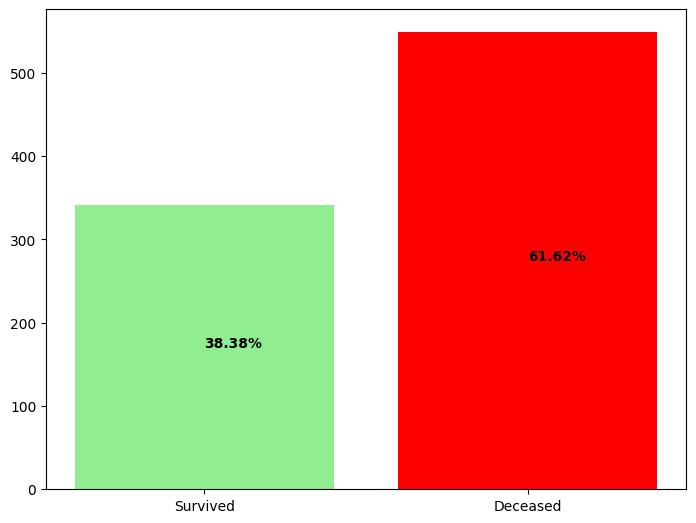

In [125]:
import matplotlib.pyplot as plt

survived = sum([person for person in train['Survived']])
surv_pct = round((survived/number_of_passangers)*100, 2)
passed = number_of_passangers - survived
passed_pct = round((passed/number_of_passangers)*100, 2)

print(f'Number of survivors: {survived} ({surv_pct}%)')
print(f'Numer of deceased: {passed} ({passed_pct}%)')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar('Survived', survived, color='lightgreen')
ax.text(0, survived/2, f'{str(surv_pct)}%', color = 'black', fontweight = 'bold')
ax.bar('Deceased', passed, color='red')
ax.text(1, passed/2, f'{str(passed_pct)}%', color = 'black', fontweight = 'bold')

plt.show()

From the analysis above, it is clear that the data is not balanced. Since it is not too imbalanced, we will proceed with data preprocessing and supervised models, and after some results we will implement data balancing techniques such as data augmentation, SMOTE, among others.

## First Model (Logistic Regression)

In [400]:
import os
import pandas as pd

PATH = f"{root}/Titanic/data/"
training_file = "train.csv"
train_path = os.path.join(PATH,training_file)

test_file = "test.csv"
test_path = os.path.join(PATH, test_file)

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)



Since the dependent variable to be predicted is a binar, several classifiers are going to be used and compared. Firstly, a model that is as fast as simple to get started, Logistic Regression.

For this first model, only 2 features will be used. Firstly, 'Sex' as the only independent variable and secondly, 'Sex' and 'Age' together. Later on, more features will be added if needed.

- Import the model

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

l2model = LogisticRegression(penalty='l2')
l1model = LogisticRegression(penalty='l1')

#### Logistic Regression with one feature (Sex)

- Defining dependent (y) and independent (x) variables:

In [363]:
# .values returns the numpy array representation of the Series' values
# More info about WHY to reshape in: https://realpython.com/logistic-regression-python/#logistic-regression-overview

x = train['Sex'].values.reshape((-1,1)) 
y = train['Survived'].values

In [236]:
model = l2model

In [146]:
model.fit(X=x, y=y)

LogisticRegression()

- First predictions

In [159]:
p_pred = model.predict_proba(x)
y_pred = model.predict(x)

- Basic evaluation (IT IS NOT CORRECT TO USE THE SAME DATA FROM THE TRAINING FOR VALIDATION!)

In [161]:
from sklearn.metrics import classification_report, confusion_matrix

score = model.score(x,y)
conf_matrix = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [164]:
print(report)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

[[468  81]
 [109 233]]


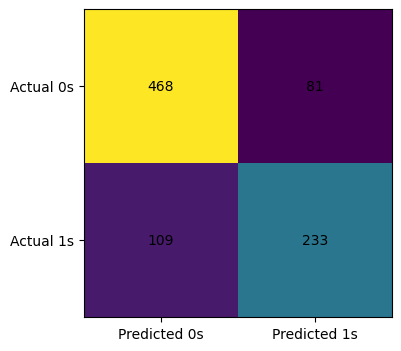

In [176]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(conf_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()

- Applying the same preprocessing to the testing set and making predictions on it

In [174]:
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [175]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [177]:
x_test = test['Sex'].values.reshape((-1,1))

In [194]:
y_test_pred = model.predict(x_test)

In [197]:
test_predictions = {'PassengerId': test['PassengerId'], 'Survived': y_test_pred}
test_predictions = pd.DataFrame(test_predictions)

In [203]:
test_predictions.to_csv(r'C:\Users\Ato\Documents\Programming\Python\Titanic\predictions\logistic_regression_l1.csv', index=False)

##### Sigmoid test

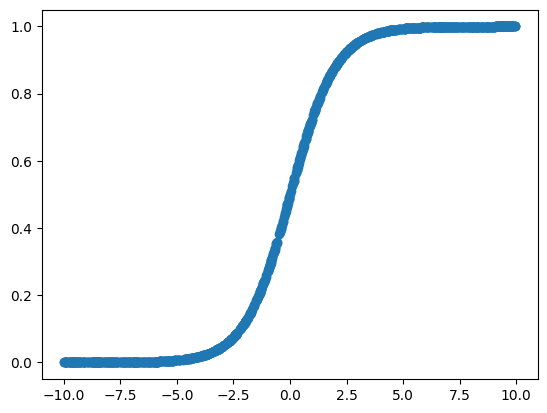

In [230]:
import math
import random

x = [random.uniform(-10, 10) for _ in range(1000)]
y = [1/(1+math.exp(-data)) for data in x]

fig = plt.subplot()
fig.scatter(x,y)
plt.show()

#### Logistic Regression with two features (Sex and Age)

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

l2model = LogisticRegression(penalty='l2')
l1model = LogisticRegression(penalty='l1')

- Preprocessing (Age missing values and sex binarization )

In [270]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
train['Age'] = train['Age'].fillna(train['Age'].mean())

- Separate dependent ('Survived') and independent ('Sex', 'Age') variables 

In [271]:
X = train[['Sex', 'Age']]
y = train['Survived']

- Separate train validation

In [272]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

- train the model

In [273]:
l2model.fit(X_train, y_train)

LogisticRegression()

- Validate the model

In [274]:
y_pred = l2model.predict(X_val)

- Results

In [275]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Confusion Matrix:
 [[45  9]
 [ 8 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90



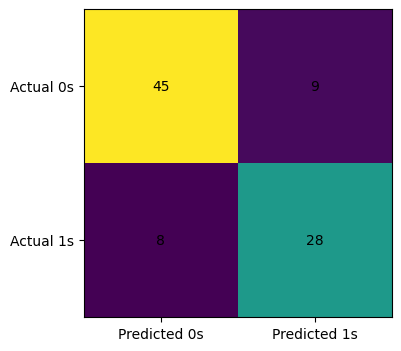

In [277]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(conf_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()

- Building csv for Kaggle

In [286]:
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test['Age'] = test['Age'].fillna(test['Age'].mean())

X_test = test[['Sex','Age']]

In [287]:
X_test.head(10)

,Sex,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0
5,0,14.0
6,1,30.0
7,0,26.0
8,1,18.0
9,0,21.0


In [288]:
y_test_pred = l2model.predict(X_test)

In [291]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [292]:
SexAgePrediction = {'PassengerId': test['PassengerId'],'Survived': y_test_pred}
SexAgePrediction = pd.DataFrame(SexAgePrediction)


In [294]:
SexAgePrediction.to_csv(r'C:\Users\Ato\Documents\Programming\Python\Titanic\predictions\Logistic_2var.csv', index=False)

#### Logistic Regression with ALL features

In [379]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Preprocessing

In [401]:
###### SEX ######
# Hot encoding Sex class manually
preprocessed_sex = train.loc[:,'Sex'].apply(lambda x: 0 if x == 'male' else 1).copy() # Using .loc and copy() to avoid SettingWithCopyWarning

###### AGE ######
# Filling 'Age' missing values with .mean() (it is commented out due to bad results in previous sections)
#preprocessed_age = train.loc[:,'Age'].fillna(train['Age'].mean())

###### EMBARKED ######
# One hot encoding 'Embarked' feature
preprocessed_embarked = pd.get_dummies(train.loc[:,'Embarked'])

###### CABIN ######
# 1. Filling missing values (which is assumed that the passanger didn't have cabin) with '0'
# 2. One hot encoding everything (it woudnt' be needed)
# 3. Keeping only the '0' feature, so we know if the passanger had a cabin or not.
preprocessed_cabin = train.loc[:,'Cabin'].fillna('0').copy()
preprocessed_cabin_all = pd.get_dummies(preprocessed_cabin)
preprocessed_cabin_binary = preprocessed_cabin_all.loc[:,'0'].copy()

In [402]:
preprocessed_embarked.head()

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


- Pearson Correlation

In [403]:
features = ['Pclass', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']

num_dataframe = train[features]
num_dataframe['Sex'] = preprocessed_sex
num_dataframe = pd.concat([num_dataframe, preprocessed_embarked], axis=1)
num_dataframe['Cabin'] = preprocessed_cabin_binary

C:\Users\Ato\AppData\Local\Temp\ipykernel_8908\3976137450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_dataframe['Sex'] = preprocessed_sex


In [404]:
num_dataframe.head()

,Pclass,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S,Cabin
0,3,0,22.0,1,0,7.2500,0,False,False,True,True
1,1,1,38.0,1,0,71.2833,1,True,False,False,False
2,3,1,26.0,0,0,7.9250,1,False,False,True,True
3,1,1,35.0,1,0,53.1000,1,False,False,True,False
4,3,0,35.0,0,0,8.0500,0,False,False,True,True


<Axes: >

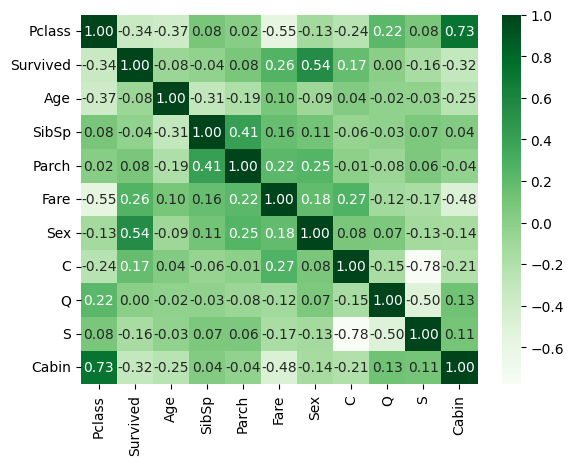

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = num_dataframe.corr()
sns.heatmap(corr_matrix, cmap='Greens', annot=True, fmt=".2f")

Once the pearson coeficients are obtained, the classes with higher absolute coeficients (with the target class) will be chosen to train the model. In this case, there's strong or high correlation (that does **NOT** mean causality) between **'Survived'** and **Pclass**, **Fare**, **Sex** and **Cabin**. Therefore, a training dataset with these values will be built.

- Higher pearson coeficient classes in a dataframe

In [410]:
num_dataframe.head()

,Pclass,Survived,Age,SibSp,Parch,Fare,Sex,C,Q,S,Cabin
0,3,0,22.0,1,0,7.2500,0,False,False,True,True
1,1,1,38.0,1,0,71.2833,1,True,False,False,False
2,3,1,26.0,0,0,7.9250,1,False,False,True,True
3,1,1,35.0,1,0,53.1000,1,False,False,True,False
4,3,0,35.0,0,0,8.0500,0,False,False,True,True


In [417]:
drop_features = ['Age','SibSp','Parch','C','Q','S','Survived']
X = num_dataframe.drop(columns=drop_features).copy()
y = num_dataframe.loc[:,'Survived'].copy()


- Train - Val division

In [434]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

l1model = LogisticRegression(penalty='l1', solver='liblinear')
l2model = LogisticRegression(penalty='l2')

In [435]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [436]:
l1model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [438]:
y_val_pred = l1model.predict(X_val)

In [439]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_val, y_pred)
report = classification_report(y_val, y_pred)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Confusion Matrix:
 [[45  9]
 [ 8 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90



Since the validation results obtained with more features are identical to the previous ones, there is no point in testing it on Kaggle. Let's move to the next model: Random Forest (Will be found in a new ipynb (RandomForest.ipynb))